<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [9]:
# Let's start simple?

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
np.random.seed(421)

In [10]:
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [11]:
x_train.shape

# Pretty small

(404, 13)

In [12]:
x_test.shape

(102, 13)

In [78]:
# hmm...
y_train.shape

(404,)

In [ ]:
y_train

In [13]:
import numpy as np

y_train = np.array([y_train]).T
y_test = np.array([y_test]).T

y_train.shape

(404, 1)

In [14]:
from sklearn.preprocessing import Normalizer

# use Normalizer to transform array to 0,1
x_train = Normalizer().fit(x_train).transform(x_train)
x_test = Normalizer().fit(x_test).transform(x_test) # Hold off on running...

y_train = Normalizer().fit(y_train).transform(y_train)
y_test = Normalizer().fit(y_test).transform(y_test) # Hold off on running...


In [14]:
#instantiate model : sequential means I can give one layer at a time? I think.

model = Sequential()

In [16]:
# Baseline "vanilla" perceptron as model

# Changed the loss function for regression since our target is a bunch of floats

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=150) #, batch_size=)

In [ ]:
scores = model.evaluate(x_train,y_train)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

In [26]:
from tensorflow.keras.optimizers import SGD

In [27]:


model_improved = Sequential(name="4layerPoo")

model_improved.add(Dense(17, input_dim=13, activation='relu', name='DenseFriend1'))
model_improved.add(Dense(5, activation='relu'))
model_improved.add(Dense(5, activation='relu'))
model_improved.add(Dense(1, activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)
model_improved.compile(loss='mean_squared_error', optimizer=opt,
              metrics=['accuracy'])

# Let's inspect our new architecture
model_improved.summary()

Model: "4layerPoo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DenseFriend1 (Dense)         (None, 17)                238       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 90        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 364
Trainable params: 364
Non-trainable params: 0
_________________________________________________________________


In [16]:
from matplotlib import pyplot as plt

In [17]:
from tensorflow.keras.optimizers import SGD

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import Normalizer
np.random.seed(421)

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

y_train = np.array([y_train]).T
y_test = np.array([y_test]).T

# use Normalizer to transform array to 0,1
x_train = Normalizer().fit(x_train).transform(x_train)
x_test = Normalizer().fit(x_test).transform(x_test) # Hold off on running...

y_train = Normalizer().fit(y_train).transform(y_train)
y_test = Normalizer().fit(y_test).transform(y_test) # Hold off on running...

Train: 0.000, Test: 0.000


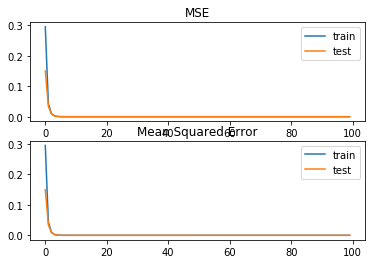

In [18]:
# Fit the model, then evaluate (all in one block...)

model_improved = Sequential(name="4layerPoo")

model_improved.add(Dense(17, input_dim=13, activation='relu'))
model_improved.add(Dense(5, activation='relu'))
model_improved.add(Dense(5, activation='relu'))
model_improved.add(Dense(1, activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)
model_improved.compile(loss='mean_squared_error', 
                       optimizer=opt,
                       metrics=['mse'])

history = model_improved.fit(x_train, y_train, 
                             validation_data=(x_test, y_test), 
                             epochs=100, 
                             verbose=False)

# evaluate the model
_, train_mse = model_improved.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_improved.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.subplot(211)
plt.title('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

TypeError: must be real number, not list

Train MSE: 0.000, Test MSE: 0.000


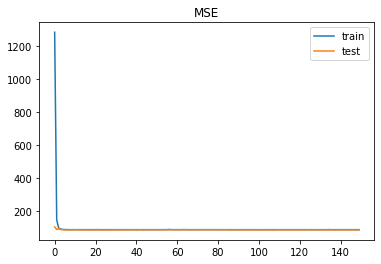

In [56]:
import math

# evaluate the model
_, train_mse = model_improved.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_improved.evaluate(x_test, y_test, verbose=0)
print('Train MSE: %.3f, Test MSE: %.3f' % (train_mse, test_mse))

# plot loss during training
# plt.subplot(211)
plt.title('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [89]:
history.history['mse']

[0.36034647,
 0.059497416,
 0.01428557,
 0.0024855994,
 0.00065188354,
 0.00042917993,
 0.00031529772,
 0.00025382414,
 0.00023984328,
 0.00023083169,
 0.0002262091,
 0.00021719951,
 0.000208073,
 0.00020346238,
 0.00019519149,
 0.00018973158,
 0.00018302567,
 0.00017754748,
 0.0001729537,
 0.00016815739,
 0.00016425966,
 0.00016199624,
 0.00015731977,
 0.00015465966,
 0.00015248732,
 0.0001501348,
 0.0001463778,
 0.00014372471,
 0.00014158488,
 0.00014068735,
 0.00013653877,
 0.00013453509,
 0.00013277124,
 0.00013035703,
 0.00012825603,
 0.00012615758,
 0.00012446735,
 0.00012241173,
 0.00012088223,
 0.000119045,
 0.00011763742,
 0.00011600788,
 0.00011401641,
 0.00011303375,
 0.000111646856,
 0.00010978966,
 0.000109269204,
 0.000106877014,
 0.00010545852,
 0.00010535783,
 0.000103893726,
 0.00010178722,
 9.997104e-05,
 9.870408e-05,
 9.818886e-05,
 9.637319e-05,
 9.522887e-05,
 9.395913e-05,
 9.293061e-05,
 9.250121e-05,
 9.053762e-05,
 8.971636e-05,
 8.925747e-05,
 8.796926e-05,
 

In [87]:
score = model_improved.evaluate(x_train,y_train)
print(scores[0]*100)

404/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [20]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [43]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [44]:
x_train.shape

(60000, 28, 28)

In [23]:
np.count_nonzero(x_train)

23423502

In [29]:
28*28

784

In [27]:
23423502/47040000

0.4979485969387755

In [ ]:
x_train[0]

In [40]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# # Normalize Our Data
# x_train = x_train / 255
# x_test = x_test / 255

In [35]:
x_train.shape

(60000, 784)

In [41]:
import numpy as np

y_train = np.array([y_train]).T
y_test = np.array([y_test]).T

In [42]:
from sklearn.preprocessing import Normalizer

# use Normalizer to transform array to 0,1
x_train = Normalizer().fit(x_train).transform(x_train)
x_test = Normalizer().fit(x_test).transform(x_test) # Hold off on running...

In [47]:
from tensorflow.keras import utils

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

NameError: name 'num_classes' is not defined

In [ ]:
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Fit the model, then evaluate (all in one block...)

model_improved = Sequential(name="4layerPoo")

model_improved.add(Dense(17, input_dim=784, activation='relu'))
model_improved.add(Dense(5, activation='relu'))
model_improved.add(Dense(5, activation='relu'))
model_improved.add(Dense(1, activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)
model_improved.compile(loss='mean_squared_error', 
                       optimizer=opt,
                       metrics=['mse'])

history = model_improved.fit(x_train, y_train, 
                             validation_data=(x_test, y_test), 
                             epochs=100, 
                             verbose=False)

# evaluate the model
_, train_mse = model_improved.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_improved.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.subplot(211)
plt.title('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.